In [12]:
# Numpy for array
import numpy as np
# Pyplot for plotting
import matplotlib.pyplot as plt
# Scipy for convex hull (perimiter of points)
from scipy.spatial import ConvexHull, convex_hull_plot_2d
# Math for pi/cos/sin
import math
# Random for random angle
import random

In [2]:
# Map each point to 2d space (return only x and y axis)
def map_two_d(points):
    return points[:, :2]

In [3]:
# Function to plot the projection of the points
def plot_projection(points):
    projection = map_two_d(points)
    plt.plot(projection[:, 0], projection[:, 1],'o', color='black')

In [4]:
# Function to calculate convex hull and plot
def plot_hull(points):
    projection = map_two_d(points)
    hull = ConvexHull(projection)
    convex_hull_plot_2d(hull)
    plt.show()

In [5]:
# Calculate the area of the hull (shadow) given the cubes points
def area_hull(points):
    projection = map_two_d(points)
    hull = ConvexHull(projection)
    return hull.volume

In [6]:
# Points which specify the 3d cube [x, y, z]
cube_points = np.array([
    [0.5, 0.5, 0.5],
    [0.5, 0.5, -0.5],
    [0.5, -0.5, 0.5],
    [-0.5, 0.5, 0.5],
    [-0.5, -0.5, -0.5],
    [-0.5, -0.5, 0.5],
    [-0.5, 0.5, -0.5],
    [0.5, -0.5, -0.5]
])

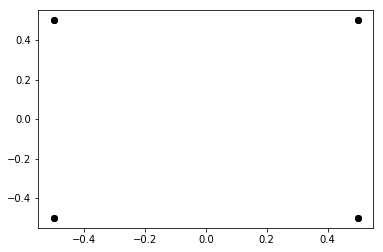

In [7]:
# Plot basic cube
plot_projection(cube_points)

1.0


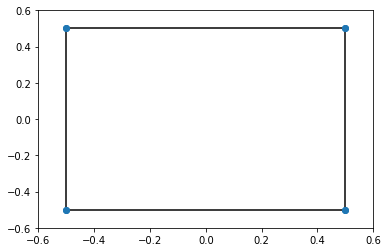

In [8]:
# Calculate convex hull and area
print(area_hull(cube_points))
plot_hull(cube_points)

In [9]:
# Rotation function, to rotate by three angles
def rotate(point, x, y, z):
    T_x = np.array([
        [1, 0, 0],
        [0, math.cos(x), -math.sin(x)],
        [0, math.sin(x), math.cos(x)]
    ])
    T_y = np.array([
        [math.cos(y), 0, math.sin(y)],
        [0, 1, 0],
        [-math.sin(y), 0, math.cos(y)]
    ])
    T_z = np.array([
        [math.cos(z), -math.sin(z), 0],
        [math.sin(z), math.cos(z), 0],
        [0, 0, 1]
    ])
    return point @ T_x @ T_y @ T_z


1.0000000000000004


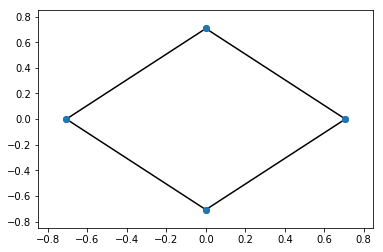

In [10]:
# Basic rotation by 45deg
print(area_hull(rotate(cube_points, 0, 0, math.pi/4)))
plot_hull(rotate(cube_points, 0, 0, math.pi/4))

1.4142135623730951


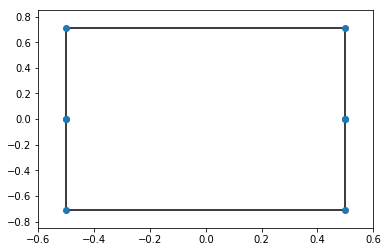

In [25]:
# Another rotation by 45deg
print(area_hull(rotate(cube_points, math.pi/4, 0, 0)))
plot_hull(rotate(cube_points, math.pi/4, 0, 0))

1.707106781186548


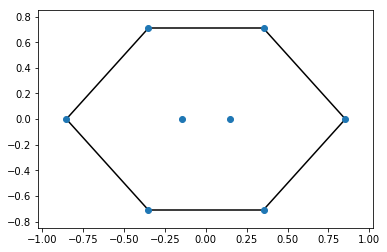

In [26]:
# Rotation by 45deg in both directions
print(area_hull(rotate(cube_points, math.pi/4, math.pi/4, 0)))
plot_hull(rotate(cube_points, math.pi/4, math.pi/4, 0))

In [24]:
# Function to assign random rotations and calculate average area
def estimate_area(iterations):
    average = 0
    for i in range(iterations):
        x = random.uniform(0, math.pi) 
        y = random.uniform(0, math.pi)
        z = random.uniform(0, math.pi)
        area = area_hull(rotate(cube_points, x, y, z))
        average = (average * i + area) / (i + 1)
    return average

estimate_area(100000)

1.4474452317375148